In [ ]:
import pandas as pd # 필요한 모듈 그냥 불러온 것
import numpy as np
import matplotlib.pyplot as plt
import os
# plt.rc('font', family='AppleGothic')

In [ ]:
current = os.getcwd() # 데이터 불러오기
folder = os.path.dirname(os.path.abspath(os.path.dirname((current))))
folder

'C:\\Users\\KO\\Dropbox'

In [ ]:
# 데이터 불러오기
# 데이터 위치에 따른 확인 필요 
data_path = folder + '/ML_code/Data/'
data_path

'C:\\Users\\KO\\Dropbox/ML_code/Data/'

In [ ]:
# 데이터 불러오기
data = pd.read_excel(data_path + "df_case_clean_0508.xlsx") # dropbox에 있는 엑셀 파일 불러오기
data.rename(columns={"보도일" : "date"}, inplace=True) # 보도일을 date로 이름을 바꾸는 함수, inplace 적용하는 것

# data = pd.read_excel(data_path + "df_death_clean.xlsx")
# data.rename(columns={"사망일" : "date"}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\KO\\Dropbox/ML_code/Data/df_case_clean_0508.xlsx'

In [ ]:
plt.figure(figsize=(12,3)) # 그래프 박스 만들기
plt.bar(data.date, data.total) # 막대 그래프, 날짜와 전체 확진자를 표현한 그래프

In [ ]:
df = data.iloc[:200,:].copy() # 200일 까지만 끊어서 df에 넣음

<BarContainer object of 200 artists>

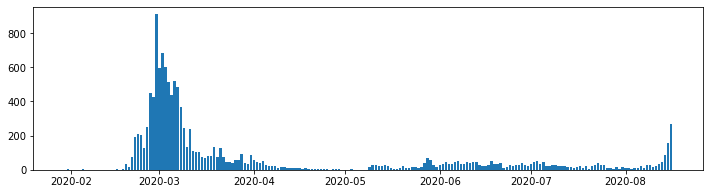

In [ ]:
plt.figure(figsize=(12,3)) # 12,3 사이즈의 그래프 박스를 만듦
plt.bar(df.date, df.total) # 막대 그래프, 200일와 전체 확진자를 표현한 그래프 

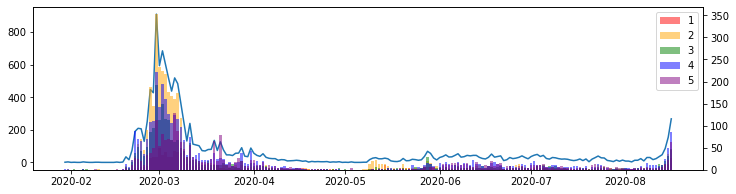

In [ ]:
D = df.date # 날짜 데이터
T = df.total # 전체 확진자 수 데이터
y1 = df["1"] # 연령대별로 데이터를 저장
y2 = df["2"] 
y3 = df["3"] 
y4 = df["4"] 
y5 = df["5"] 

plt.figure(figsize=(12,3)) # 그래프 박스 만들기

ax = plt.subplot() # 그래프 박스 안에 그래프를 그리겠다?

ax.plot(D, T) # 전체 확진자 수에 대한 시간에 대한 그래프

ax1 = ax.twinx()
ax1.bar(D, y1, label=1, color='r', alpha=0.5) # 각 연령대별로 그린 것
ax1.bar(D, y2, label=2, color='orange', alpha=0.5)
ax1.bar(D, y3, label=3, color='green', alpha=0.5)
ax1.bar(D, y4, label=4, color='b', alpha=0.5)
ax1.bar(D, y5, label=5, color='purple', alpha=0.5)

ax1.legend() # 범례를 그리는 코드


# plt.ylim(0, max(total))

---

In [ ]:
df = data.copy() # 복사
# 시간에서 년, 달, 계절로 나눔
df["year"] = df.date.dt.year # 년
df["month"] = df.date.dt.month # 달
df["season"] = (df.month//3) % 4    # {0:겨울, 1:봄, 2:여름, 3:가을} # 계절

In [ ]:
def season_df(DataFrame, season_code):
    YEAR = DataFrame.year.unique() # 년도 겹치는 것은 다 삭제 -> 2020, 2021, 2022만 남음 
    df_arr = []

    for y in YEAR: # 연도별로
        df = DataFrame[(DataFrame.season == season_code) & # 계절별로 모으는 것? 
                  (DataFrame.year == y)].iloc[:,2:7].sum() # 연령별로 모은 것? 
        df_arr.append(df)
    temp = pd.concat(df_arr, axis=1) # concat : 합치는 함수
    temp.columns = YEAR # 열을 년도로 설정
    return temp.T

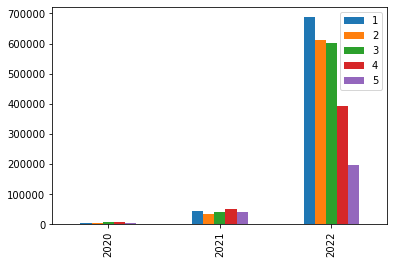

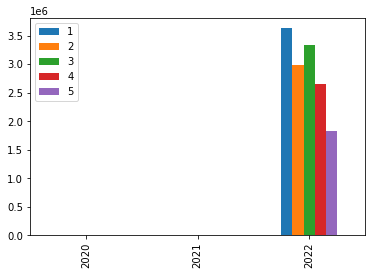

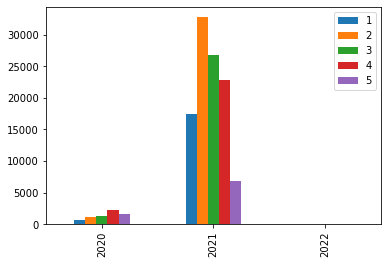

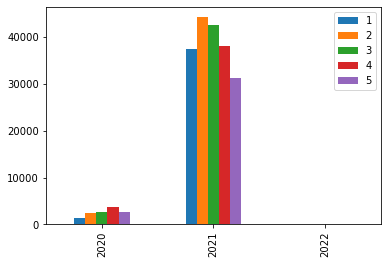

In [ ]:
for i in [0,1,2,3]: # 계절별로 그래프를 그림
    season_df(df, i).plot(kind='bar') # 연령별로 막대 그래프를 그림

---

In [ ]:
from sklearn.preprocessing import StandardScaler # 표준 정규화 함수 불러옴
from sklearn.preprocessing import MinMaxScaler #  min-max 정규화 함수 불러옴

from sklearn.linear_model import LinearRegression  # 선형회귀 메소드 불러옴
from sklearn.preprocessing import PolynomialFeatures # 다항회귀 메소드 불러옴
from sklearn.pipeline import Pipeline # 전처리, 예측을 편리하게 해주는 메소드
from sklearn.model_selection import cross_val_score # 교차검증 메서드 불러옴
from sklearn.metrics import accuracy_score, mean_squared_error # 정확도, MSE 평가지표 불러옴
from sklearn.model_selection import train_test_split # 훈련용, 테스트용 데이터 분리하는 메소드 불러옴
from sklearn.svm import SVR # 서포트 벡터 회귀 메소드 불러옴
from sklearn.svm import SVC # 서포트 벡터 분류 메소드 불러옴

In [ ]:
df = data.iloc[:85].copy() # 85행까지 data를 복사해 df 객체에 저장
# df = data.copy()
df['idx'] = df.index # 현재 index를 idx열에 저장
df['total_sum'] = df.total.cumsum() # 누적합
df = df[['idx', 'total_sum']] # idx와 누적합이 있는 열만 남기고 제외

In [ ]:
df = df.values

y = df[:,1] # 누적합
X = df[:,0] # idx


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # 7:3비율로 학습데이터와 테스트 데이터 분리

X_train = X_train.reshape(-1,1)  # reshape : -1 : 남은 배열의 길이와 차원으로부터 추정해서 알아서 지정/ 뒤에 오는 것이 행 개수
X_test = X_test.reshape(-1,1) # 즉 이 데이터들은 한 줄로 밑으로 나열된 형태

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
scaler = StandardScaler() # 정규화 모델적용
X = scaler.fit_transform(X.reshape(-1,1)) # x를 정규화하고 학습
y = scaler.fit_transform(y.reshape(-1,1)) # fit_Trainsform은 train data에서만 사용한다. test데이터에 적용하는 경우 테스트 데이터까지 학습해버리므로 평가의 의미를 잃어버리게 된다.

X_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)


y_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test) # train data로부터 학습한 값을 테스트 데이터에 적용하기 위해서 transform()함수를 사용

In [ ]:
lr = LinearRegression() # 선형회귀 객체 생성
lr.fit(X_scaled, y_scaled) # 객체에 두 변수를 fitting
y_preds = lr.predict(X_test_scaled)  # fitting 한 객체를 통해 x_test를 넣어 값을 예측

In [ ]:
deg = 4
polynomial_features = PolynomialFeatures(degree=deg, include_bias=False) # 4차식, 편향 제거한 다항회귀모델적용
linear_regression = LinearRegression() # 선형회귀모델 객체 생성
pipeline = Pipeline([("polynomial_features", polynomial_features),   # pipeline함수를 통해서 pipeline 객체에 다항회귀와 선형회귀모델을 적용한 객체를 포함시킨다.
                        ("linear_regression", linear_regression)
                        ])
pipeline.fit(X,y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [ ]:
svr = SVR() # SVR 모델 적용 객체 생성
svr.fit(X_scaled, y_scaled)
y_preds = svr.predict(X_test_scaled)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


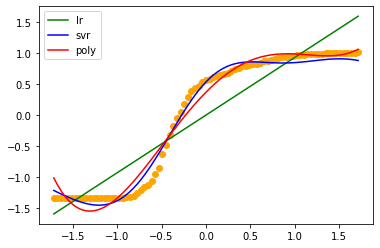

In [ ]:
plt.scatter(X,y, color='orange') # 산점도 생성 (기본 실제값)
plt.plot(X,lr.predict(X), label="lr", color='g') # 선형회귀로 예측한 선 생성
plt.plot(X,svr.predict(X), label='svr', color='b') # svr모델로 예측한 선 생성
plt.plot(X, pipeline.predict(X), label='poly', color='r') # 다항회귀로 예측한 곡선 생성
plt.legend() # 범례생성

---

In [ ]:
df = data.copy()
df['idx'] = df.index
df['label'] = 0
idx = []
wave = [('2020-02-18','2020-05-05'), ('2020-08-12','2020-11-12'), ('2020-11-13','2021-01-20')]

for w in wave:
    temp = df[df.date.between(w[0], w[1])].copy()  # wave안의 각 날짜 사이에 포함되는 날짜를 temp에 저장
    idx += list(temp.index) # idx리스트에 temp의 인덱스를 추가

df.iloc[idx,-1] = 1 # idx 즉, 위에서 나온 wave의 사이에 포함되는 날짜들에 해당되는 행의 label을 1로 부여

In [ ]:
df = df[['idx', 'total', '1', '2', '3', '4', '5', 'label']]

<BarContainer object of 831 artists>

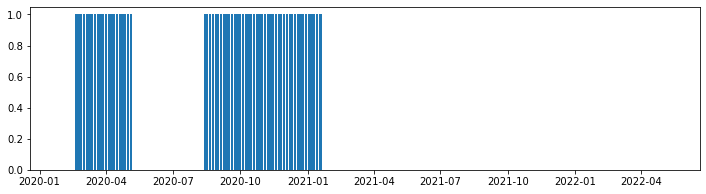

In [ ]:
plt.figure(figsize=(12,3))
plt.bar(data.date, df.label)

In [ ]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm = SVC()
svm.fit(X_scaled, y_train)
y_preds = svm.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_preds) # y_preds와 실제값 y_test사이의 정확도 ( 지도학습의 평가 지표중 하나)

0.88